# Tutoriel Python

* Import des donnees
* Analyse descriptive
* Preparation des donnees
* Creation d’un modele en cross validation
* Calcul des predictions et soumission

# Import des données

Avant de rentrer dans le vif du sujet, importons quelques packages necessaires pour ce tutoriel :

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [36]:
train = pd.read_csv('./challenge_miashs_train.csv', encoding='utf-8')
test = pd.read_csv('./challenge_miashs_test.csv', encoding='utf-8')

In [37]:
pd.set_option("display.max_columns", 9999) # permet de voir toutes les colonnes
train.head(3)

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,30%,comprimé pelliculé,orale,Autorisation active,2010,2008,Procédure de reconnaissance mutuelle,BIOGARAN,"CHLORHYDRATE DE FEXOFÉNADINE, FEXOFÉNADINE BASE",2.24
1,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,30%,gélule,orale,Autorisation active,1976,1990,Procédure nationale,JANSSEN CILAG,"LOPÉRAMIDE (CHLORHYDRATE DE), LOPÉRAMIDE BASE",2.32
2,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,gélule,orale,Autorisation active,1998,1986,Procédure nationale,BIOGARAN,PARACÉTAMOL,1.08


# Analyse descriptive

### Structure des datasets

Le dataset ```train``` comporte les caracteristiques et prix de ~6000 boites de medicaments. C'est ce dataset que nous allons utiliser pour creer un modele.
Chaque boite de medicament est decrite par une observation de 41 variables. Ces variables sont decrites dans le fichier `Description.pdf` present dans la cle usb.

Le dataset ```test``` comporte les caracteristiques des ~2000 boites de medicaments dont il faut predire le prix. A la difference de ```train```, le prix des boites de medicaments n'est bien sur pas inclus.

### Distribution des donnees

Jetons maintenant un coup d'oeil a la distribution des donnees

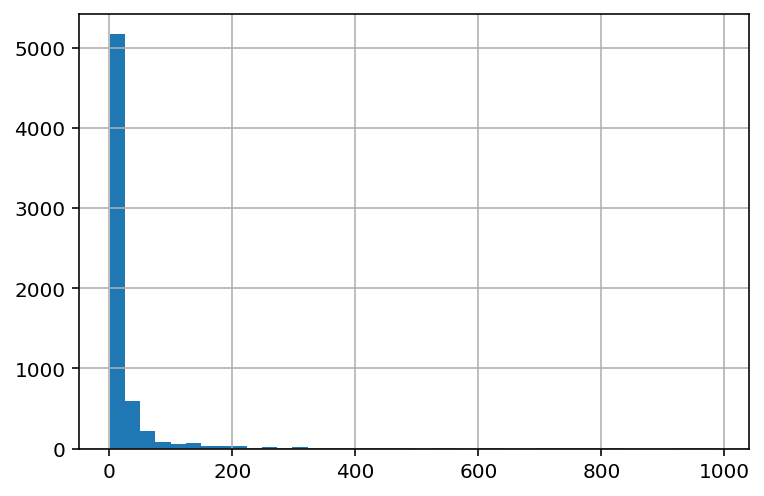

In [40]:
train['prix'].hist(bins=40);

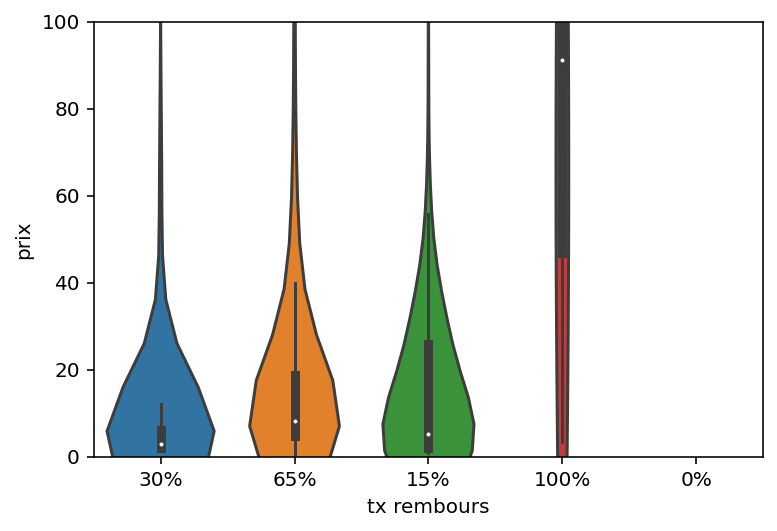

In [45]:
# Influence sur les prix de la feature "tx rembours"
plt.ylim(0, 100)
sns.violinplot(y="prix", x="tx rembours", data=train);

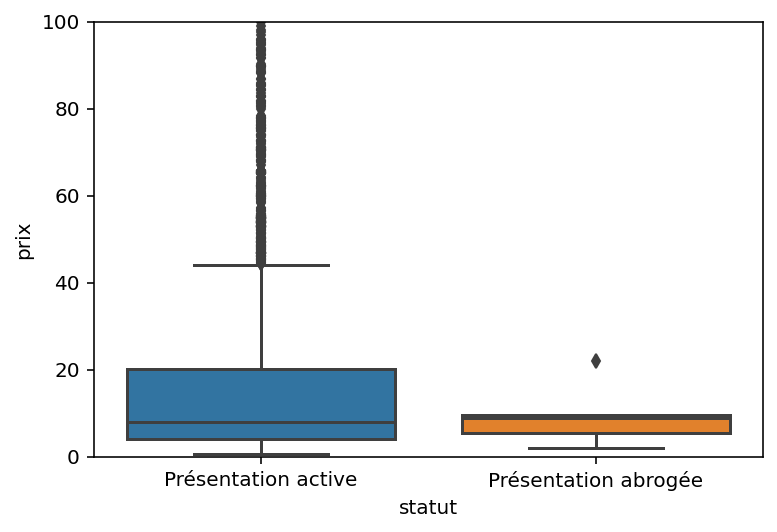

In [44]:
# Influence sur les prix de la feature "statut"
plt.ylim(0, 100)
sns.boxplot(y="prix", x="statut", data=train);

# Preparation des donnees

In [47]:
# On rassemble pour le feature engineering
df = pd.concat([train,test])
train.head(2)

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,30%,comprimé pelliculé,orale,Autorisation active,2010,2008,Procédure de reconnaissance mutuelle,BIOGARAN,"CHLORHYDRATE DE FEXOFÉNADINE, FEXOFÉNADINE BASE",2.24
1,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,30%,gélule,orale,Autorisation active,1976,1990,Procédure nationale,JANSSEN CILAG,"LOPÉRAMIDE (CHLORHYDRATE DE), LOPÉRAMIDE BASE",2.32


In [50]:
# Pas de valeur NaN a combler
train.isna().sum()

libelle              0
libelle_plaquette    0
libelle_ampoule      0
libelle_flacon       0
libelle_tube         0
libelle_stylo        0
libelle_seringue     0
libelle_pilulier     0
libelle_sachet       0
libelle_comprime     0
libelle_gelule       0
libelle_film         0
libelle_poche        0
libelle_capsule      0
nb_plaquette         0
nb_ampoule           0
nb_flacon            0
nb_tube              0
nb_stylo             0
nb_seringue          0
nb_pilulier          0
nb_sachet            0
nb_comprime          0
nb_gelule            0
nb_film              0
nb_poche             0
nb_capsule           0
nb_ml                0
statut               0
etat commerc         0
agrement col         0
tx rembours          0
forme pharma         0
voies admin          0
statut admin         0
date declar annee    0
date amm annee       0
type proc            0
titulaires           0
substances           0
prix                 0
dtype: int64

In [52]:
# Concentrons nous pour le benchmark sur les variables deja au type numerique
df.dtypes

libelle               object
libelle_plaquette      int64
libelle_ampoule        int64
libelle_flacon         int64
libelle_tube           int64
libelle_stylo          int64
libelle_seringue       int64
libelle_pilulier       int64
libelle_sachet         int64
libelle_comprime       int64
libelle_gelule         int64
libelle_film           int64
libelle_poche          int64
libelle_capsule        int64
nb_plaquette           int64
nb_ampoule             int64
nb_flacon              int64
nb_tube                int64
nb_stylo               int64
nb_seringue            int64
nb_pilulier            int64
nb_sachet              int64
nb_comprime            int64
nb_gelule              int64
nb_film                int64
nb_poche               int64
nb_capsule             int64
nb_ml                float64
statut                object
etat commerc          object
agrement col          object
tx rembours           object
forme pharma          object
voies admin           object
statut admin  

In [66]:
numeric_var_list = df.dtypes[df.dtypes == 'int64'].index
numeric_var_list

Index(['libelle_plaquette', 'libelle_ampoule', 'libelle_flacon',
       'libelle_tube', 'libelle_stylo', 'libelle_seringue', 'libelle_pilulier',
       'libelle_sachet', 'libelle_comprime', 'libelle_gelule', 'libelle_film',
       'libelle_poche', 'libelle_capsule', 'nb_plaquette', 'nb_ampoule',
       'nb_flacon', 'nb_tube', 'nb_stylo', 'nb_seringue', 'nb_pilulier',
       'nb_sachet', 'nb_comprime', 'nb_gelule', 'nb_film', 'nb_poche',
       'nb_capsule', 'date declar annee', 'date amm annee'],
      dtype='object')

# Feature Engineering

In [24]:
# A vous de jouer

# On separe a nouveau train et test

In [25]:
df_train = df[:train.shape[0]]
df_test = df[(df.shape[0] - test.shape[0]):]

In [26]:
target_train = df_train.prix
df_train = df_train[numeric_var_list]
df_test = df_test[numeric_var_list]

# Creation d'un modele

### Métrique MAPE

La métrique MAPE n'étant pas disponible dans scikit-learn, nous la codons

In [27]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Random Forest

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_train, target_train, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
rf.fit(X_train, y_train)

mape_error(y_test, rf.predict(X_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Cela veut dire notre modele predit les prix des medicaments avec environ 188% d’erreur en moyenne. Par exemple, si un medicament vaut reellement 100€, notre prediction moyenne est de l'ordre de 288€.

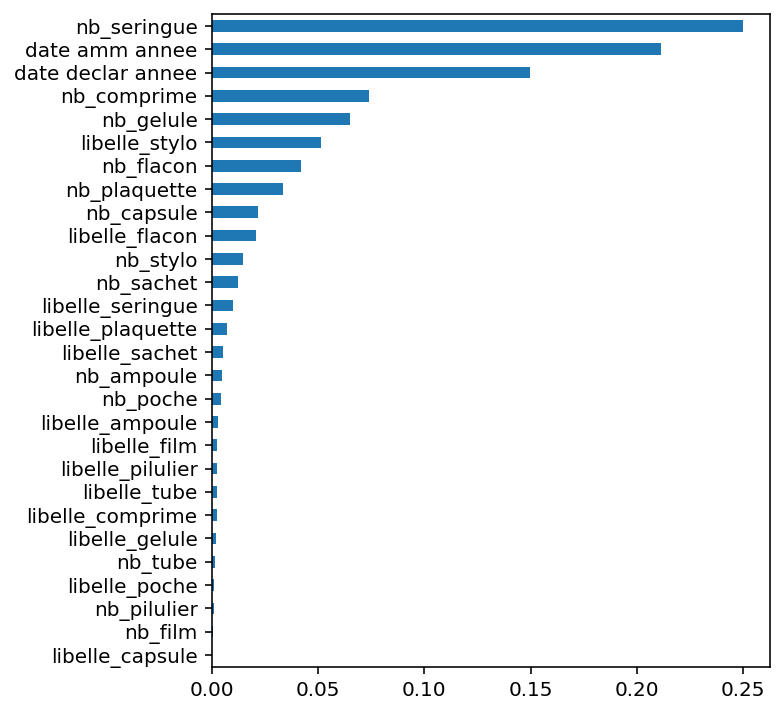

In [84]:
# On visualise les variables importantes selon notre modèle random forest
feat_imp = rf.feature_importances_
df_feat = pd.DataFrame(data=feat_imp, index=X_train.columns)

plt.figure(figsize=(5,6))
feat = df_feat[0].sort_values(ascending=False)
ax = feat.iloc[:30].plot(kind="barh")
ax.invert_yaxis()

# Calcul des predictions et soumission

In [ ]:
# A vous de jouer
predictions = 

In [ ]:
assert predictions.shape[0] == 2141
pd.DataFrame(predictions).to_csv('soumission.csv', header=['prix'], index=False)

Faites parvenir votre soumission à Samuel pour qu'il vous donne le score.